# Qiskit config

In [1]:
from qiskit import IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer, transpile

backend = Aer.get_backend('qasm_simulator')

shots   = 8192
backend_name = backend.name()
backend_config = backend.configuration()
backend_qubits = backend_config.n_qubits

# Experiment procedures

In [2]:
import sys
sys.path.append('../../')
from qclib.state_preparation.bdsp import initialize

def bidirectional_experiment(state, s=None):
    return initialize(state, s)


# Experiment

In [3]:
import numpy as np

result = {}
for n in range(3, 16):
    print('\nn =', n)
    
    N = 2**n
    input_state = ((1.0 - 0.01) * np.random.rand(N) + 0.01) + ((1.0 - 0.01) * np.random.rand(N) + 0.01) * 1j
    input_state = input_state/np.linalg.norm(input_state)

    result[n] = []
    
    for s in range(1, n+1):
        circuit = bidirectional_experiment(input_state, s)
        transpiled_circuit = transpile(circuit, basis_gates=['u1','u2','u3', 'cx'], optimization_level=3)
        n_cx = transpiled_circuit.count_ops()['cx']
        n_dp = transpiled_circuit.depth()
        n_qb = len(circuit.qubits)
        
        result[n].append([s, n_cx, n_dp, n_qb])
        
        print('\t s = {0}\t CNOTs = {1}\t depth = {2}\t qubits = {3}'.format(s, n_cx, n_dp, n_qb))
        


n = 3
	 s = 1	 CNOTs = 28	 depth = 31	 qubits = 7
	 s = 2	 CNOTs = 18	 depth = 24	 qubits = 5
	 s = 3	 CNOTs = 10	 depth = 20	 qubits = 3

n = 4
	 s = 1	 CNOTs = 77	 depth = 58	 qubits = 15
	 s = 2	 CNOTs = 57	 depth = 51	 qubits = 11
	 s = 3	 CNOTs = 41	 depth = 48	 qubits = 7
	 s = 4	 CNOTs = 26	 depth = 51	 qubits = 4

n = 5
	 s = 1	 CNOTs = 182	 depth = 93	 qubits = 31
	 s = 2	 CNOTs = 142	 depth = 86	 qubits = 23
	 s = 3	 CNOTs = 110	 depth = 83	 qubits = 15
	 s = 4	 CNOTs = 80	 depth = 87	 qubits = 9
	 s = 5	 CNOTs = 58	 depth = 114	 qubits = 5

n = 6
	 s = 1	 CNOTs = 399	 depth = 136	 qubits = 63
	 s = 2	 CNOTs = 319	 depth = 129	 qubits = 47
	 s = 3	 CNOTs = 255	 depth = 126	 qubits = 31
	 s = 4	 CNOTs = 195	 depth = 130	 qubits = 19
	 s = 5	 CNOTs = 151	 depth = 158	 qubits = 11
	 s = 6	 CNOTs = 122	 depth = 241	 qubits = 6

n = 7
	 s = 1	 CNOTs = 840	 depth = 187	 qubits = 127
	 s = 2	 CNOTs = 680	 depth = 180	 qubits = 95
	 s = 3	 CNOTs = 552	 depth = 177	 qubits = 63
	 s =

# Plot

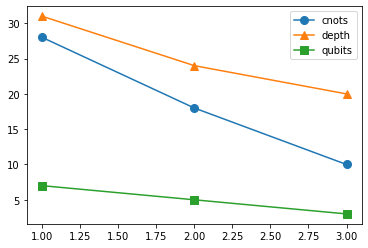

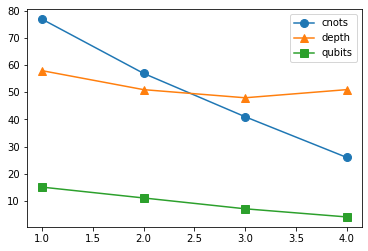

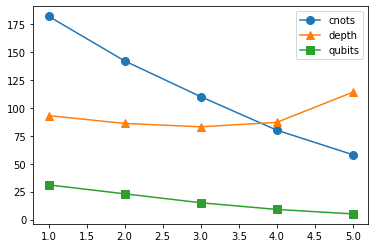

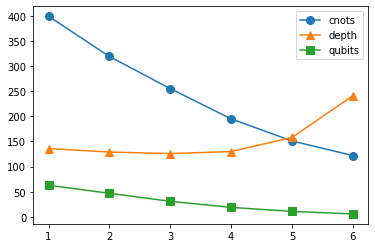

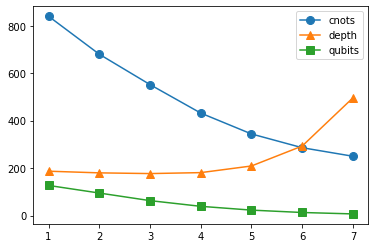

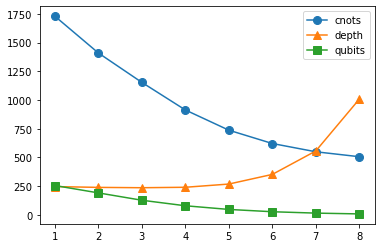

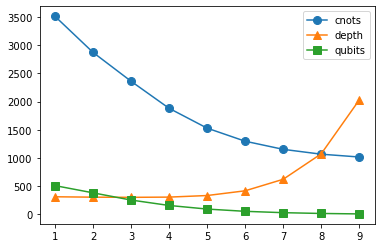

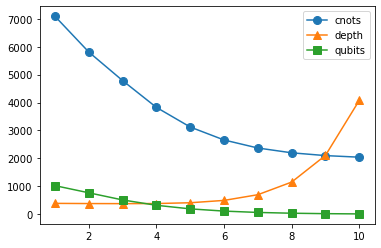

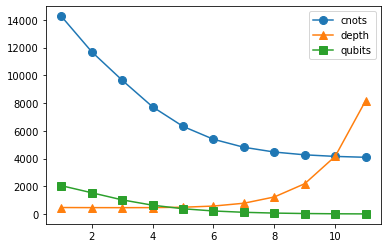

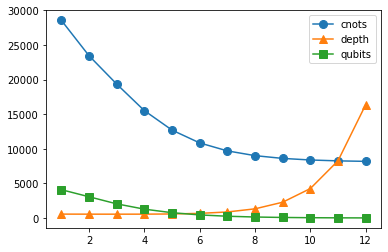

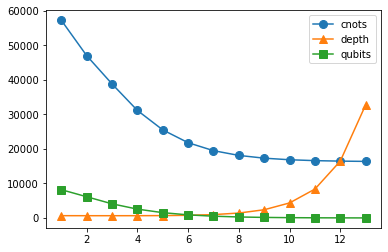

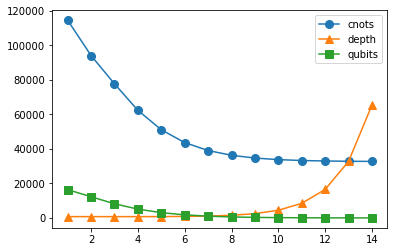

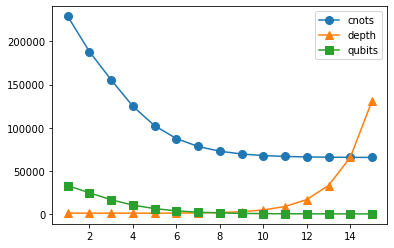

In [4]:
def plot(s, n_cx, n_dp, n_qb):
    # libraries
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    # Data
    df=pd.DataFrame({ 'x_values': s, 'cnots': n_cx, 'depth': n_dp, 'qubits': n_qb })

    # multiple line plots
    plt.plot( 'x_values', 'cnots' , data=df, marker='o', markersize=8)
    plt.plot( 'x_values', 'depth' , data=df, marker='^', markersize=8)
    plt.plot( 'x_values', 'qubits', data=df, marker='s', markersize=8)
    # show legend
    plt.legend()
    
    # config
    #plt.legend(fontsize=12)
    #plt.xticks(s, fontsize=14)
    #plt.xlabel('s', fontsize=16)
    #plt.gcf().set_dpi(200)
    
    # show graph
    plt.show()

def plot_result(n, result):
    s_range = [r[0] for r in result[n]]
    n_cx    = [r[1] for r in result[n]]
    n_dp    = [r[2] for r in result[n]]
    n_qb    = [r[3] for r in result[n]]

    plot(s_range, n_cx, n_dp, n_qb)

for n in range(3, 16):
    plot_result(n, result)